In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

In [22]:
df = pd.read_csv("job_postings_large/postings.csv")
map = pd.read_csv("job_postings_large/mappings/industries.csv")
industries = pd.read_csv("job_postings_large/jobs/job_industries.csv")

In [ ]:
industry_map = {
    "Technology": [
        "Defense and Space Manufacturing", "Computer Hardware Manufacturing",
        "Software Development", "Computer Networking Products",
        "Technology, Information and Internet",
        "Telecommunications", "IT Services and IT Consulting",
        "Internet Marketplace Platforms", "Blockchain Services",
        "Desktop Computing Software Products", "IT System Custom Software Development",
        "Data Infrastructure and Analytics", "Social Networking Platforms",
        "Business Intelligence Platforms", "Digital Accessibility Services",
        "Internet News", "Internet Publishing","Technology and Software","Technology, Information and Media",
        "Information Technology and Services", "Computer Software", "Computer Networking","Computer and Network Security",
        "IT System Data Services","IT System Data Services","IT System Testing and Evaluation",
        "Information Services",

    ],
    "Manufacturing": [
        "Consumer Electronics", "Medical Equipment Manufacturing",
        "Apparel Manufacturing", "Footwear Manufacturing",
        "Textile Manufacturing", "Furniture and Home Furnishings Manufacturing",
        "Beverage Manufacturing", "Pharmaceutical Manufacturing",
        "Sporting Goods Manufacturing", "Tobacco Manufacturing",
        "Plastics and Rubber Product Manufacturing", "Packaging and Containers Manufacturing",
        "Glass, Ceramics and Concrete Manufacturing", "Metal Valve, Ball, and Roller Manufacturing",
        "Robot Manufacturing", "Industrial Automation",
        "Transportation Equipment Manufacturing", "Oil and Gas",
        "Shipbuilding", "Chemical Manufacturing", "Mining",
        "Agricultural Chemical Manufacturing", "Paint, Coating, and Adhesive Manufacturing",
        "Electric Lighting Equipment Manufacturing", "Meat Products Manufacturing",
        "Wood Product Manufacturing", "Food and Beverage Manufacturing",
        "Machinery Manufacturing", "Construction Hardware Manufacturing",
        "Primary Metal Manufacturing", "Fabricated Metal Products",
        "HVAC and Refrigeration Equipment Manufacturing",
        "Engines and Power Transmission Equipment Manufacturing","Motor Vehicle Manufacturing",
        "Aerospace and Defense Manufacturing", "Electrical Equipment Manufacturing",
        "Aviation and Aerospace Component Manufacturing","Information Technology & Services",
        "Agriculture, Construction, Mining Machinery Manufacturing","Motor Vehicle Parts Manufacturing",
        "Renewable Energy Equipment Manufacturing","Semiconductor Manufacturing",
        "Magnetic and Optical Media Manufacturing",
        "Communications Equipment Manufacturing", "Audio and Video Equipment Manufacturing",
        "Renewable Energy Semiconductor Manufacturing","Mattress and Blinds Manufacturing",
        "Household and Institutional Furniture Manufacturing","Abrasives and Nonmetallic Minerals Manufacturing",
        "Industrial Machinery Manufacturing","Appliances, Electrical, and Electronics Manufacturing",
        "Automation Machinery Manufacturing", "Computers and Electronics Manufacturing",
    ],
    "Healthcare and Biotechnology": [
        "Medical Practices", "Hospitals and Health Care",
        "Biotechnology Research", "Mental Health Care",
        "Medical Device", "Veterinary Services", "Nursing Homes and Residential Care Facilities",
        "Animal Feed Manufacturing", "Physical, Occupational and Speech Therapists",
        "Alternative Medicine", "Personal Care Product Manufacturing",
        "Cosmetics", "Pharmaceutical Manufacturing", "Dentists",
        "Medical and Diagnostic Laboratories", "Home Health Care Services","Health and Human Services",
        "Healthcare Services and Hospitals","Biotechnology","Pharmaceuticals",
        "Medical Devices","Healthcare Information Technology",
    ],
    "Legal and Consulting Services": [
        "Law Practice", "Legal Services", "Business Consulting and Services",
        "Government Relations Services", "Strategic Management Services",
        "Alternative Dispute Resolution", "Public Policy Offices",
        "Environmental Services", "Operations Consulting",
    ],
    "Finance, Banking, Insurance and Accounting": [
        "Banking", "Insurance", "Real Estate",
        "Investment Banking", "Investment Management", "Capital Markets",
        "Venture Capital and Private Equity Principals", "Mortgage Services",
        "Credit Intermediation", "Loan Brokers", "Pension Funds",
        "Funds and Trusts", "Trusts and Estates","Accounting"
    ],
    "Real Estate, Property Management, and Construction": [
         "Leasing Non-residential Real Estate","Custruction","Real Estate",
        "Property Management",
    ],
    "Consumer Goods and Retail": [
        "Retail Apparel and Fashion", "Retail Groceries", "Retail Luxury Goods and Jewelry",
        "Online and Mail Order Retail", "Retail Motor Vehicles", "Retail Office Supplies and Gifts",
        "Retail Recyclable Materials & Used Merchandise", "Food and Beverage Retail",
        "Sporting Goods Manufacturing", "Retail Musical Instruments",
        "Retail Books and Printed News", "Retail Florists", "Tobacco Manufacturing",
        "Wholesale Import and Export", "Wholesale Luxury Goods and Jewelry",
        "Wholesale Food and Beverage", "Wholesale Chemical and Allied Products",
        "Wholesale Raw Farm Products","Retail"
    ],
    "Entertainment and Media": [
        "Entertainment Providers", "Movies, Videos, and Sound",
        "Broadcast Media Production and Distribution", "Performing Arts",
        "Gambling Facilities and Casinos", "Artists and Writers", "Online Audio and Video Media",
        "Museums, Historical Sites, and Zoos", "Spectator Sports",
        "Golf Courses and Country Clubs", "Amusement Parks and Arcades",
        "Animation and Post-production", "Media Production", "Online Media",
        "Writers and Editors", "Theater Companies",
    ],
    "Transportation and Logistics": [
        "Freight and Package Transportation", "Truck Transportation",
        "Rail Transportation", "Airlines and Aviation", "Urban Transit Services",
        "Transportation/Trucking/Railroad", "Pipeline Transportation",
        "Warehousing and Storage", "Ground Passenger Transportation",
    ],
    "Education and Research": [
        "Primary and Secondary Education", "Higher Education",
        "Education Administration Programs", "Research Services",
        "Think Tanks", "Technical and Vocational Training",
        "Non-profit Organizations", "Philanthropic Fundraising Services","Education",
        "E-Learning",
    ],
    "Government and Public Administration": [
        "Government Administration", "Public Safety", "Legislative Offices",
        "International Affairs", "Military and International Affairs",
        "Administration of Justice", "Public Policy Offices",
        "Courts of Law", "Correctional Institutions", "Housing Programs",
    ],
    "Environmental and Renewable Energy": [
        "Environmental Services", "Horticulture", "Renewables & Environment",
        "Solar Electric Power Generation", "Climate Data and Analytics",
        "Wind Electric Power Generation", "Climate Technology Product Manufacturing",
        "Conservation Programs",
    ],
    "Construction and Real Estate Development": [
        "Building Construction", "Residential Building Construction",
        "Nonresidential Building Construction", "Utility System Construction",
        "Specialty Trade Contractors", "Architecture and Planning",
        "Surveying and Mapping Services", "Civil Engineering","Construction and Real Estate Development",
        "Wholesale Building Materials",
    ],
    "Hospitality, Travel, and Food Service" : [
        "Restaurants and Food Service", "Hospitality", "Food Production",
        "Food and Beverage Manufacturing", "Food and Beverage Retail","Restaurants",
        "Food Production", "Food & Beverages", "Travel Arrangements"

    ],
    "Ambiguous or Placeholder Entries": [
        "nan", "Programs", "Non-descriptive placeholders from the list"
    ]
}

In [ ]:
def flatten(xss):
    return [x for xs in xss for x in xs]

list=industry_map.values()
industry_list=len(flatten(list))
# Create a reverse mapping from industry names to their corresponding keys
reverse_industry_map = {industry: key for key, industries in industry_map.items() for industry in industries}
reverse_industry_map["nan"]
# Replace the values in map.industry_name with their "corresponding keys
map["sub_industry_name"]=map["industry_name"]
map["industry_name"]=map['industry_name'].map(lambda x : reverse_industry_map[x] if x in reverse_industry_map.keys() else x)


In [25]:
df = df.merge(industries.merge(map,how="left", on ="industry_id").set_index("industry_id"),how="left", on ="job_id")

In [26]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'industry_name', 'sub_industry_name'],
      dtype='object')

In [27]:
df["industry_name"].value_counts()

Healthcare and Biotechnology                               25065
Technology                                                 23199
Manufacturing                                              16067
Consumer Goods and Retail                                  12966
Finance and Real Estate                                     9675
Staffing and Recruiting                                     8261
Financial Services                                          7964
Education and Research                                      6180
Hospitality and Food Service                                4915
Legal and Consulting Services                               3992
Construction                                                3305
Construction and Real Estate Development                    2079
Transportation and Logistics                                2054
Government and Public Administration                        2042
Entertainment and Media                                     2021
Food and Beverage Service

<AxesSubplot:>

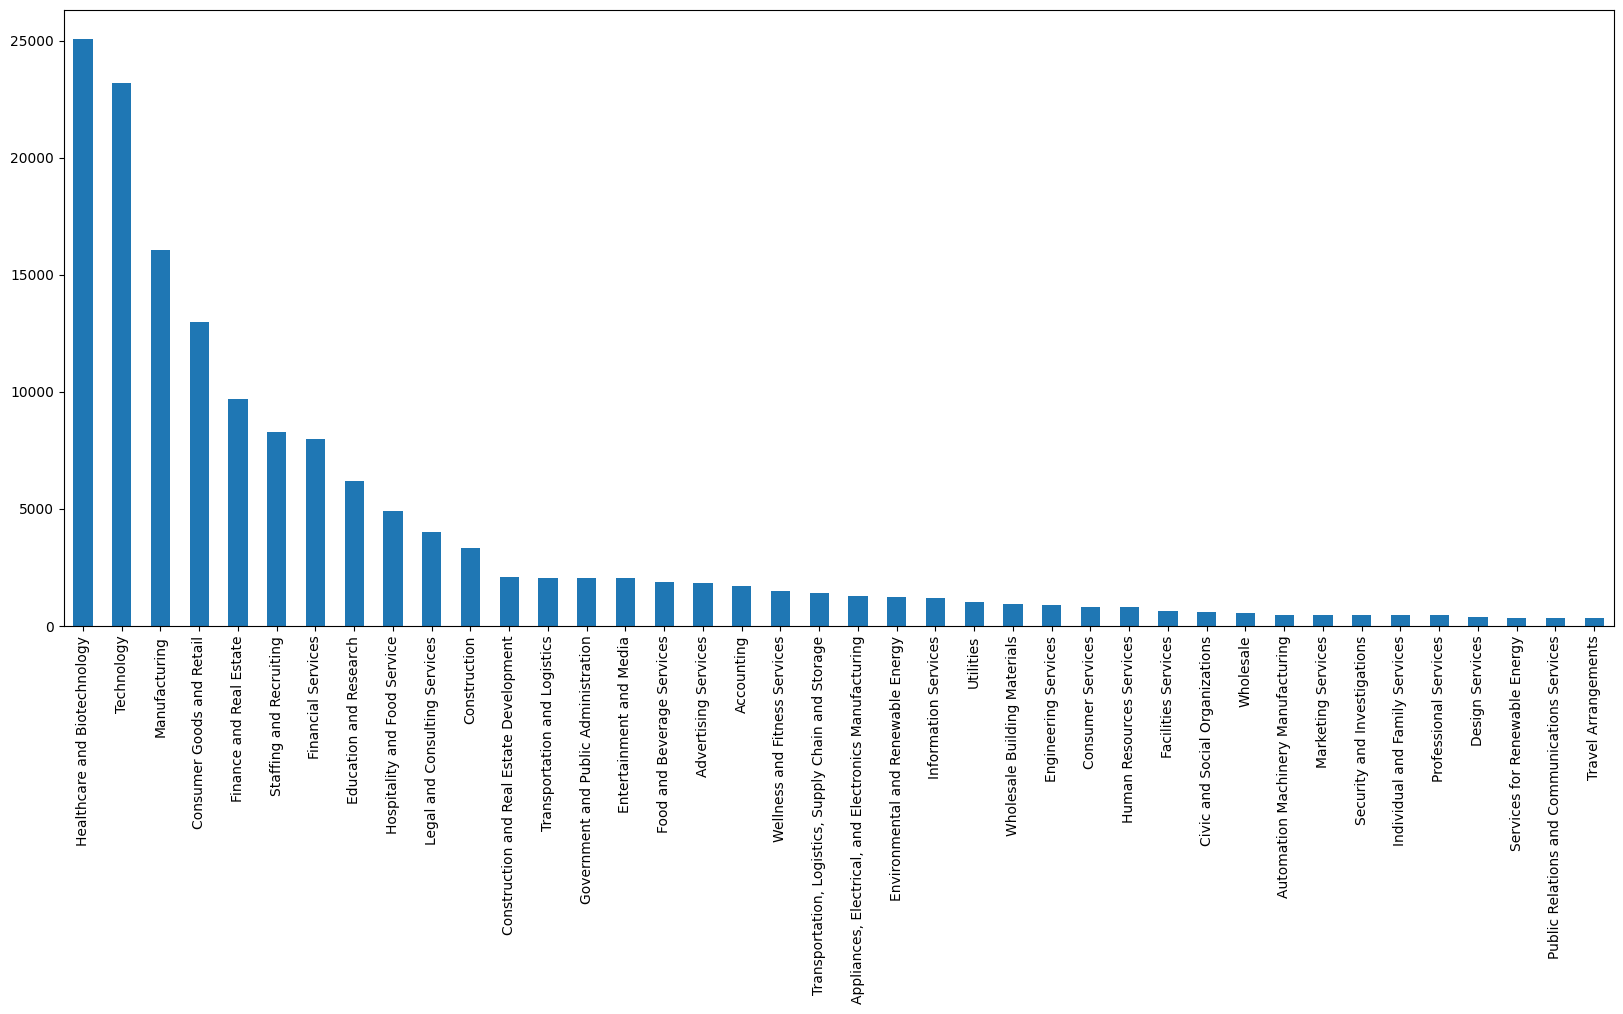

In [28]:
fig = plt.figure(figsize=(20,8))
df.industry_name.value_counts()[:40].plot(kind="bar")


<AxesSubplot:xlabel='sub_industry_name'>

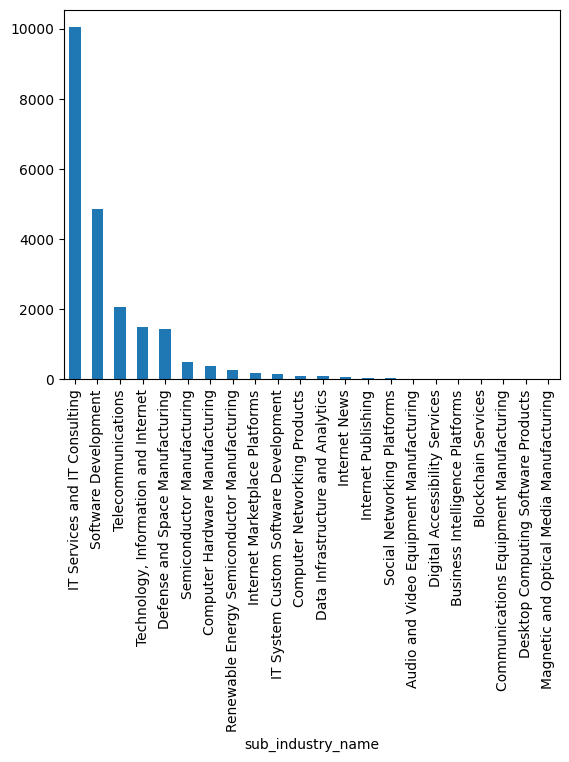

In [26]:
df[df.industry_name == "Technology"].value_counts("sub_industry_name")[:100].plot(kind="bar")

In [ ]:
df["industry_name"] =df.industry_name.replace({
    "Food and Beverage Services": "Hospitality",
    "Restaurants": "Hospitality",
    "Chemical Manufacturing" : "Manufacturing",
    "Oil and Gas" : "Energy and Natural Resources",
    "Utilities" : "Energy and Natural Resources",
    "Industrial Machinery Manufacturing" : "Manufacturing",
    "Medical Equipment Manufacturing" : "Manufacturing",
    "Defense and Space Manufacturing": "Manufacturing",
    "Motor Vehicle Manufacturing" : "Manufacturing",
    "Appliances, Electrical, and Electronics Manufacturing":"Manufacturing",
    "Aviation and Aerospace Component Manufacturing": "Manufacturing",
    "Machinery Manufacturing" : "Manufacturing",
    "Higher Education": "Education",
    "Education Administration Programs":"Education",
    "Food and Beverage Manufacturing" : "Manufacturing",
    "Medical Practices" : "Hospitals and Health Care",
    "Pharmaceutical Manufacturing" : "Hospitals and Health Care",
    "Technology, Information and Internet" : "Tech",
    "IT Services and IT Consulting" : "Tech",
    "Technology, Information and Media" :"Tech",
    "Retail Apparel and Fashion" : "Retail",
    "Mental Health Care": "Hospitals and Health Care",
    "Software Development": "Tech",
    "Truck Transportation": "Transportation, Logistics, Supply Chain and Storage",
    "Investment Banking":"Banking",
    "Investment Management":"Banking"




}
)
df.industry_name.value_counts().shape

(364,)

In [ ]:
df[["industry_name"]].value_counts()[df[["industry_name"]]].shape

(265,)

In [107]:
list(map.industry_name[:40])

['Defense and Space Manufacturing',
 'Computer Hardware Manufacturing',
 'Software Development',
 'Computer Networking Products',
 'Technology, Information and Internet',
 'Semiconductor Manufacturing',
 'Telecommunications',
 'Law Practice',
 'Legal Services',
 'Business Consulting and Services',
 'Biotechnology Research',
 'Medical Practices',
 'Hospitals and Health Care',
 'Pharmaceutical Manufacturing',
 'Veterinary Services',
 'Medical Equipment Manufacturing',
 'Personal Care Product Manufacturing',
 'Retail Apparel and Fashion',
 'Sporting Goods Manufacturing',
 'Tobacco Manufacturing',
 'Retail Groceries',
 'Food and Beverage Manufacturing',
 'Computers and Electronics Manufacturing',
 'Manufacturing',
 'Furniture and Home Furnishings Manufacturing',
 'Retail',
 'Entertainment Providers',
 'Gambling Facilities and Casinos',
 'Travel Arrangements',
 'Hospitality',
 'Restaurants',
 'Spectator Sports',
 'Food and Beverage Services',
 'Movies, Videos, and Sound',
 'Broadcast Media 

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
